In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import models
reload(models)

<module 'models' from 'models.pyc'>

In [2]:
def gaussian(X, alpha, beta):
    sqrt2pi = np.sqrt(2. * np.pi)
    lg = ((alpha * X) + (beta * X**2) +
          (.5 * np.log(-2. * beta)) +
          (.25 * alpha**2/beta) - np.log(sqrt2pi))
    return np.exp(lg)

def mog(X, pi, alpha, beta):
    return sum([pii * gaussian(X, ai, bi) for pii, ai, bi in zip(pi, alpha, beta)])

def gen_data(n_data, pi, alpha, beta, rng):
    c = rng.multinomial(1, pi, n_data).T
    return sum([c[ii]*rng.normal(-ai/bi/2., np.sqrt(-1./bi/2.), size=n_data)
                for ii, (ai, bi) in enumerate(zip(alpha, beta))])

In [3]:
rng = np.random.RandomState(20161116)
pi = [.2, .8]
alpha = [-2., 2.]
beta = [-.1, -.5]
data = gen_data(100, pi, alpha, beta, rng)
xlim = [data.min()-1, data.max()+1]
bins = 100

In [10]:
reload(models)
mg = models.GaussianMixture(2)

In [11]:
print mg.alpha.get_value()
print mg.beta.get_value()
print mg.pi.get_value()
mg.fit(data)
print mg.alpha.get_value(), alpha
print mg.beta.get_value(), beta
print mg.pi.get_value(), pi

[ 1.06174024 -0.44017018]
[-1. -1.]
[ 0.31441054  0.68558946]
-2250.37576244
-2362.51323362
-1204.7065172
-416.711818513
-326.720112404
-304.105385354
-301.852861537
-301.855914941
-301.81984201
-301.820121961
[ 0.0165449  0.0358715] [-2.0, 2.0]
[-0.02095184 -0.0038771 ] [-0.1, -0.5]
[  1.00000000e+000   1.15169405e-266] [0.2, 0.8]


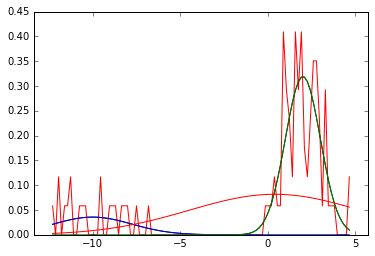

In [9]:
hist, hist_bins = np.histogram(data, bins=bins, density=True)
x = hist_bins[:-1] + (hist_bins[1] - hist_bins[0]) / 2.
dx = hist_bins[1] - hist_bins[0]
pdf = mog(x, pi, alpha, beta)
plt.plot(x, hist, '-r')
plt.plot(x, pdf, '-k')

pdf = pi[0] * gaussian(x, alpha[0], beta[0])
plt.plot(x, pdf, '-b')

pdf = pi[1] * gaussian(x, alpha[1], beta[1])
plt.plot(x, pdf, '-g')

pdf = mog(x, mg.pi.get_value(), mg.alpha.get_value(), mg.beta.get_value())
plt.plot(x, pdf, '-r')

_ = plt.xlim(xlim)